<a href="https://colab.research.google.com/github/bodadaniel/Clustering-/blob/main/clustering_scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import packages

In [2]:
import math
import numpy as np 
import pandas as pd
from sklearn.cluster import KMeans
import sklearn.metrics as sklearn_metrics
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.cluster import DBSCAN

## Data

In [3]:
def create_data(n_samples = [400, 300, 300]):
  """ Create data with certain shape of clusters and a number of a sample """
  blobs_x, blobs_y = make_blobs(n_samples = n_samples[0], centers = 2, cluster_std = 1.3, random_state = 333)
  circle_x, circle_y = make_circles(n_samples = n_samples[1], noise = 0.09, factor = 0.3, random_state = 333)
  moon_x, moon_y = make_moons(n_samples = n_samples[2], noise = 0.07, random_state = 333)

  x = np.concatenate([blobs_x, 3 * moon_x + 9, 3 * circle_x - 13])
  x[:,1] = x[:,1] / 7

  rnd = np.random.default_rng(seed = 333)
  rnd.shuffle(x)
  return x

X = create_data()

##Vizualise

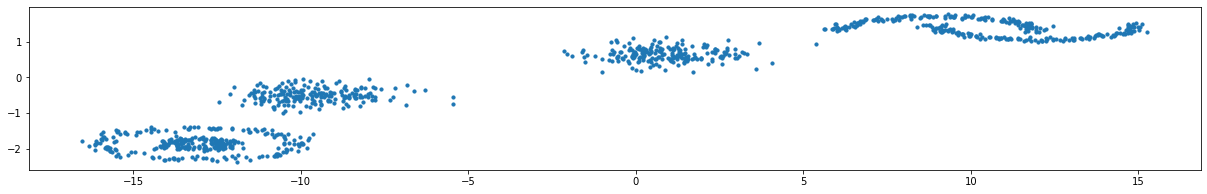

In [4]:
def visualise_clusters(x, labels = None, cmap = 'viridis'):
    """ Visualize data in R{2} """
    plt.figure(figsize = (21, 3))
    plt.scatter(*x.T, s = 10, c = labels, cmap = cmap)
    plt.show()

visualise_clusters(X)

## Scoring

In [5]:
def silhouette_score(X, labels):
  """Wrapper function of Scikit-learn's silhouette_score. The only difference is it doesn't throw an error where there is only one label."""
  
  if len(set(labels)) == 1:
    return float("NaN")
  else:
    return sklearn_metrics.silhouette_score(X, labels)

def bic_score(X: np.ndarray, labels: np.array):
  """ BIC score for the goodness of fit of clusters. """
    
  n_points = len(labels)
  n_clusters = len(set(labels))
  n_dimensions = X.shape[1]

  n_parameters = (n_clusters - 1) + (n_dimensions * n_clusters) + 1

  loglikelihood = 0
  for label_name in set(labels):
    X_cluster = X[labels == label_name]
    n_points_cluster = len(X_cluster)
    centroid = np.mean(X_cluster, axis=0)
    variance = np.sum((X_cluster - centroid) ** 2) / (len(X_cluster) - 1)
    loglikelihood += \
      n_points_cluster * np.log(n_points_cluster) \
      - n_points_cluster * np.log(n_points) \
      - n_points_cluster * n_dimensions / 2 * np.log(2 * math.pi * variance) \
      - (n_points_cluster - 1) / 2
    
  bic = loglikelihood - (n_parameters / 2) * np.log(n_points)
        
  return bic

## Hyperparamter space

In [6]:
eps = np.arange(0.05, 0.6, 0.05)
min_samples = np.arange(2, 10, 1)
hyperpars = {i: pars for i, pars in enumerate([[x,y] for x in eps for y in min_samples]) }

## Result

In [7]:
score = {'silhouette_score' : [],
         'bic_score' : []}

for i, pars_i in enumerate(hyperpars.values()):
  dbsc = DBSCAN(eps=pars_i[0], min_samples=pars_i[1])
  clusters = dbsc.fit_predict(X)
  labels = dbsc.labels_   
  score['silhouette_score'].append(silhouette_score(X, labels))
  score['bic_score'].append(bic_score(X, labels))
  #break
    

<ipython-input-5-776428c745a6>:23: RuntimeWarning: invalid value encountered in double_scalars
  variance = np.sum((X_cluster - centroid) ** 2) / (len(X_cluster) - 1)


## Best ones

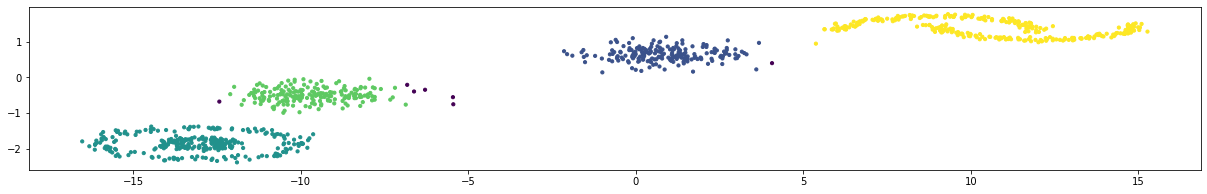

pars 84: [0.55, 6] 
silhouette_score: 0.6036605621056473


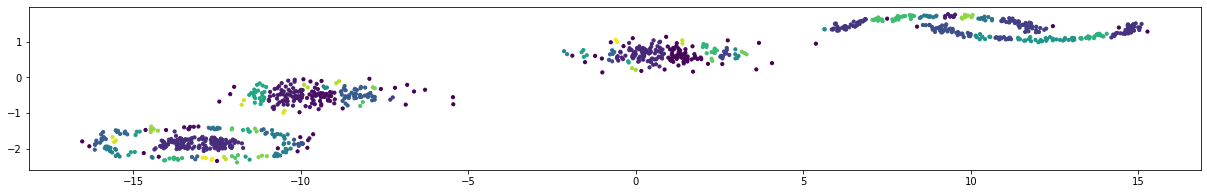

pars 16: [0.15000000000000002, 2] 
bic_score: -4245.587450968036


In [10]:
def show_best(score_in, X):
  """ Choose best models based on different scoring functions """
  pars_i = hyperpars[np.nanargmax(score[score_in])]
  dbsc = DBSCAN(eps=pars_i[0], min_samples=pars_i[1])
  clusters = dbsc.fit_predict(X)
  labels = dbsc.labels_   
  visualise_clusters(X, labels) 
  print(f'pars {np.nanargmax(score[score_in])}:', pars_i,f'\n{score_in}:', np.nanmax(score[score_in]) )

show_best('silhouette_score', X)
show_best('bic_score', X)